# Dataset Description

## Context
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.
As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

## Content  
The store dataset has the following 5 attributes and their data description is as given below:

## Attributes Description
- Order- Date The date on which the order was placed
- Segment- The segment to which the product belongs
- Market- The market to which the customer belongs
- Sales- Total sales value of the transaction
- Profit- Profit made on the transaction

If you check the entries in the dataset, you will see that the store caters to 7 different geographical market segments and 3 major customer segments, i.e. consumer, corporate and home office as can be seen in the table below.

## Market Segment
- Africa Consumer
- APAC (Asia Pacific) Corporate
- Canada Home Office
- EMEA(Middle East) 
- EU (European Union) 
- LATAM (Latin America) 
- US (United States) 

## Acknowledgements
The dataset has been gotten from kaggle and can be found [here](https://www.kaggle.com/prathimananjundaiah/global-superstore)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Data Science Projects\GlobalSuperstoreData.csv')

In [3]:
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
data.tail()

,Order Date,Segment,Market,Sales,Profit
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000
51289,22-05-2012,Consumer,LATAM,61.380,1.8000


In [5]:
data.shape

(51290, 5)

In [6]:
data.dtypes

Order Date     object
Segment        object
Market         object
Sales         float64
Profit        float64
dtype: object

In [7]:
data.size

256450

In [8]:
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


`What are the different geographical market segments (Market) and customer segments (Segment) present in the dataset`

In [9]:
data["Market"].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [10]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

`Visualize the distribution of the counts of geographical markets, what do you notice ?`

In [11]:
market_counts = data.Market.value_counts()
market_counts

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

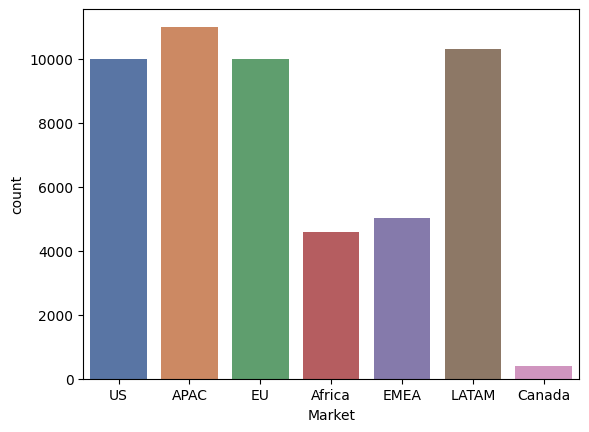

In [12]:
sns.countplot(x= 'Market', data=data, palette='deep')
plt.show()

(Asia Pacific) Corporate is the highest market, while Canada Home office is the lowest market for Global Mart

`Visualize the distribution of the counts of customer segments`

In [13]:
data.Segment.value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

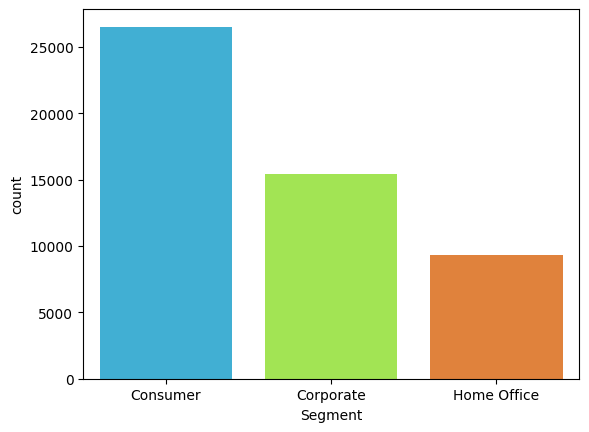

In [14]:
sns.countplot(x = 'Segment', data=data, palette='turbo')
plt.show()

The Consumer segment is the highest product category, while the Home Office segment is the lowest product category for Global Mart.

`Create a new feature (market_segment) in the dataset that contains the geographical market_customer segment in the dataset e.g. values in this feature would look like US_Consumer, EU_Home Office`

In [15]:
df = pd.DataFrame(data) 

In [16]:
df

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
...,...,...,...,...,...
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000


In [17]:
# Using DataFrame.apply() and lambda function
df["Market_Segment"] = df[["Market", "Segment"]].apply(lambda x: "_".join(x), axis =1)

In [18]:
df = pd.DataFrame(df)

In [19]:
df

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer
...,...,...,...,...,...,...
51285,19-06-2014,Corporate,APAC,65.100,4.5000,APAC_Corporate
51286,20-06-2014,Consumer,US,0.444,-1.1100,US_Consumer
51287,02-12-2013,Home Office,US,22.920,11.2308,US_Home Office
51288,18-02-2012,Home Office,LATAM,13.440,2.4000,LATAM_Home Office


`Visualize the distribution of the counts of the new feature market_segment`

In [20]:
df["Market_Segment"].value_counts()

Market_Segment
APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: count, dtype: int64

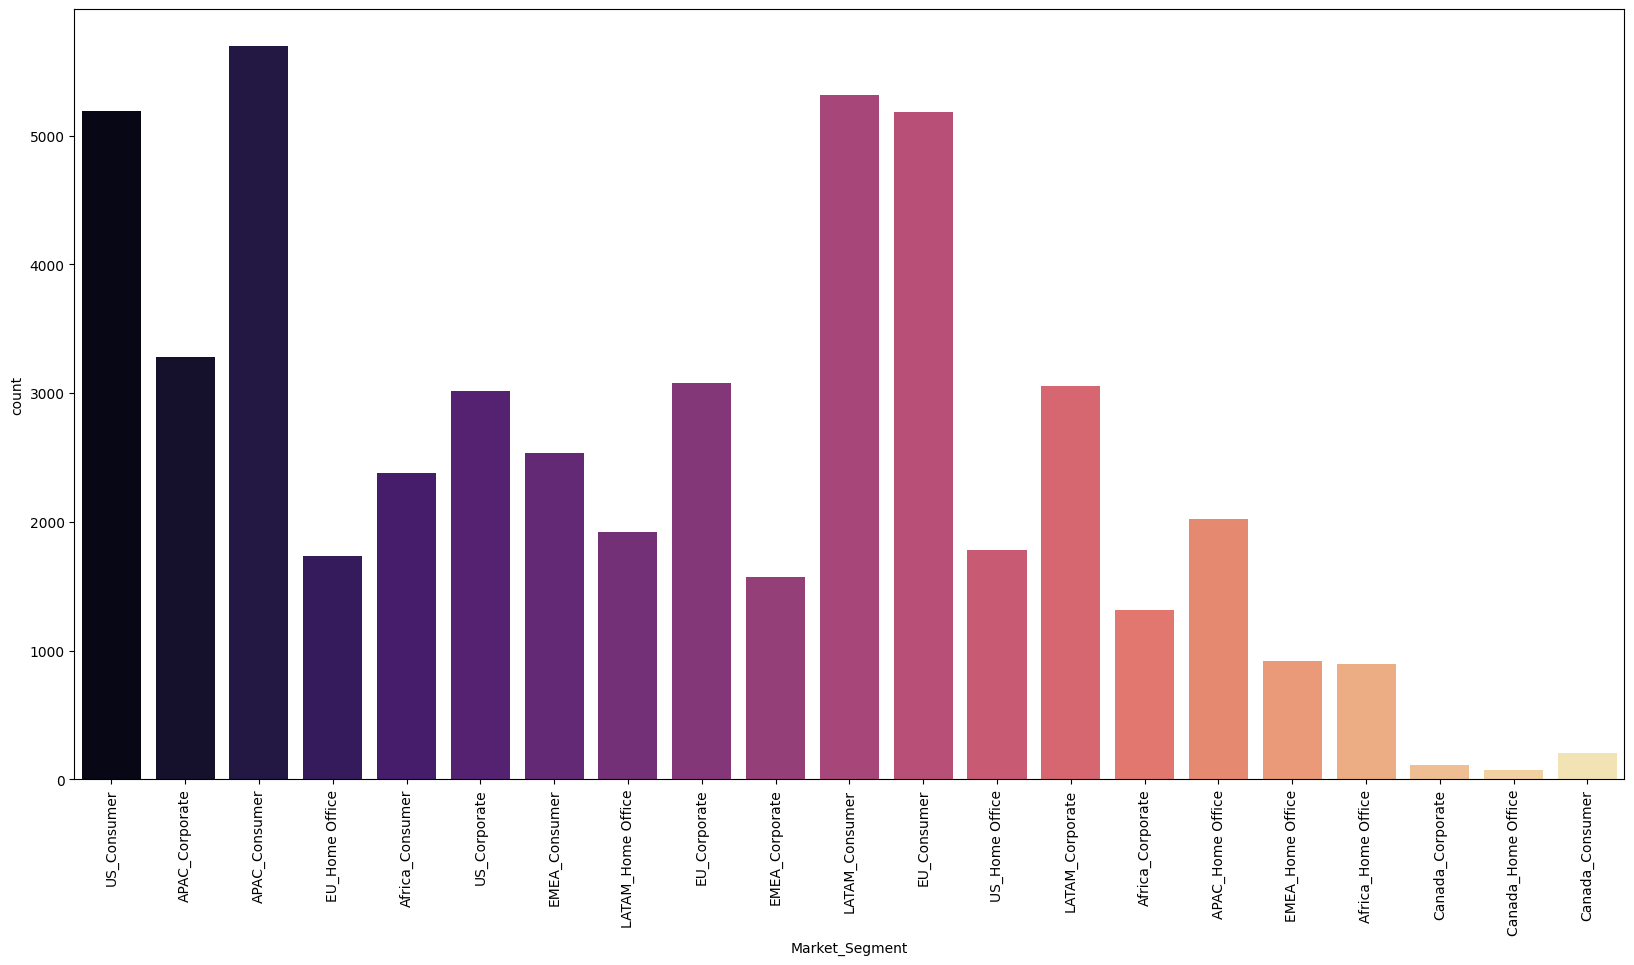

In [21]:
plt.figure(figsize=(20,10))
my_plot = sns.countplot(x = 'Market_Segment', data=df, palette='magma')
# rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
# show the plot
plt.show()

The APAC_Consumer market segment has the highest count while the Canada_Home Office market segment has the lowest count

How do the markets compare against each other with sales and profit?

In [22]:
df

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer
...,...,...,...,...,...,...
51285,19-06-2014,Corporate,APAC,65.100,4.5000,APAC_Corporate
51286,20-06-2014,Consumer,US,0.444,-1.1100,US_Consumer
51287,02-12-2013,Home Office,US,22.920,11.2308,US_Home Office
51288,18-02-2012,Home Office,LATAM,13.440,2.4000,LATAM_Home Office


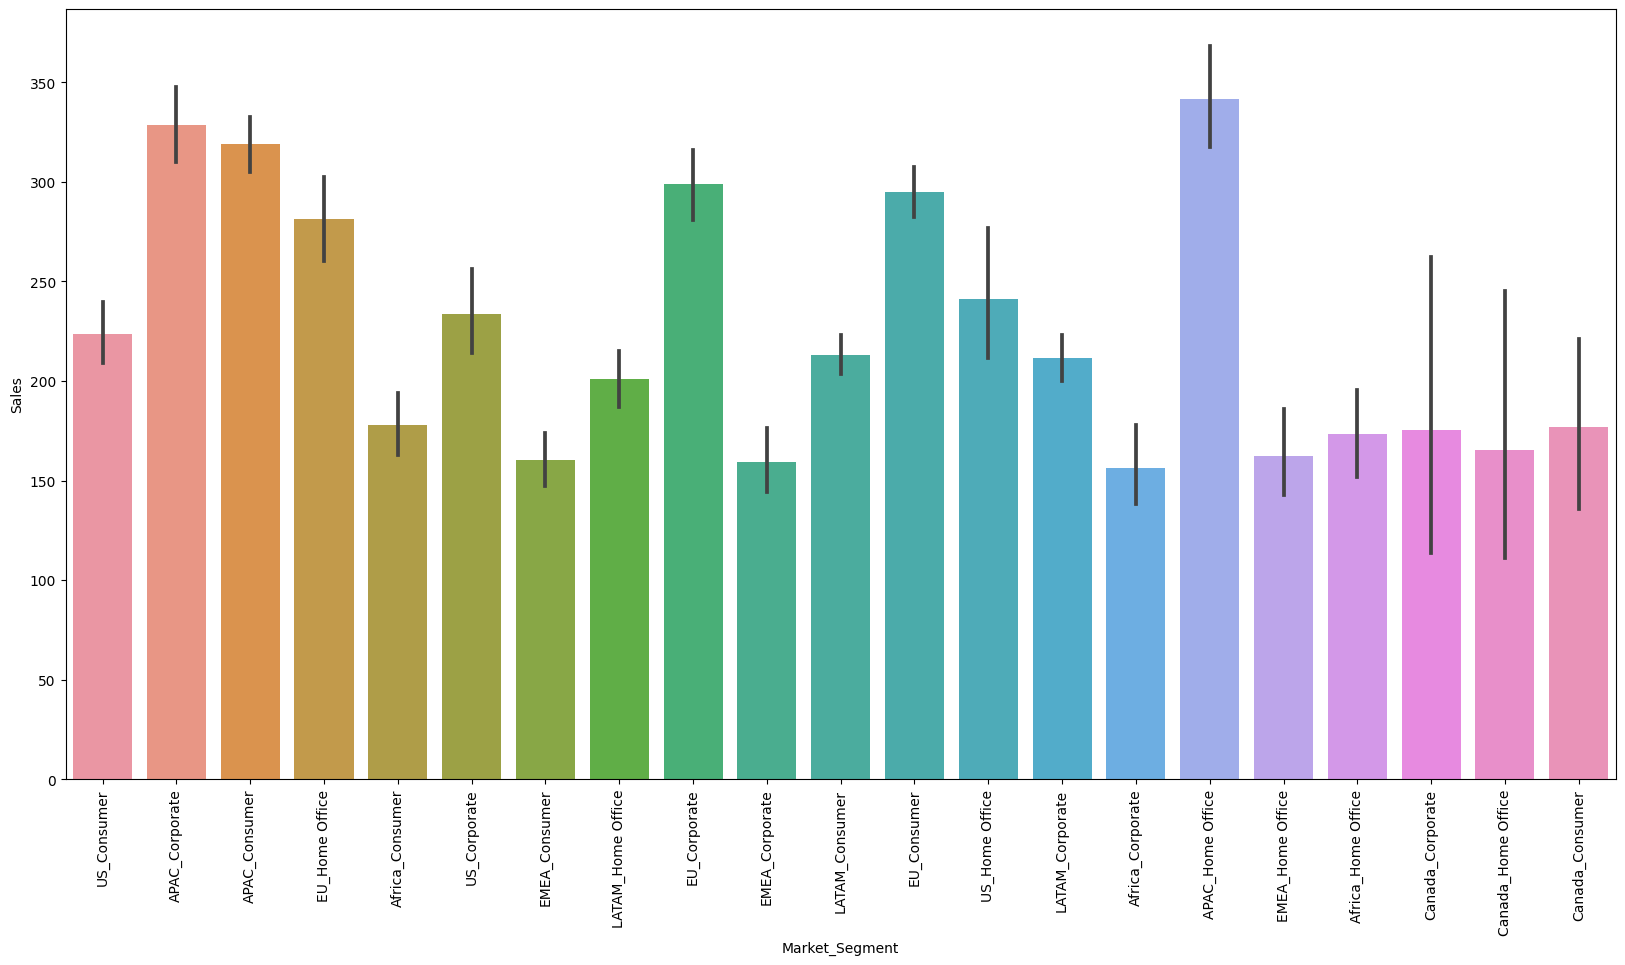

In [23]:
plt.figure(figsize=(20,10))
my_plot = sns.barplot(x='Market_Segment', y='Sales', data=df)
# rotate the x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
# show the plot
plt.show()

APAC_Home Office market segment is forecasted to have the highest Sales , while Africa_Corporate market segment is forecasted to have the lowest Sales. 

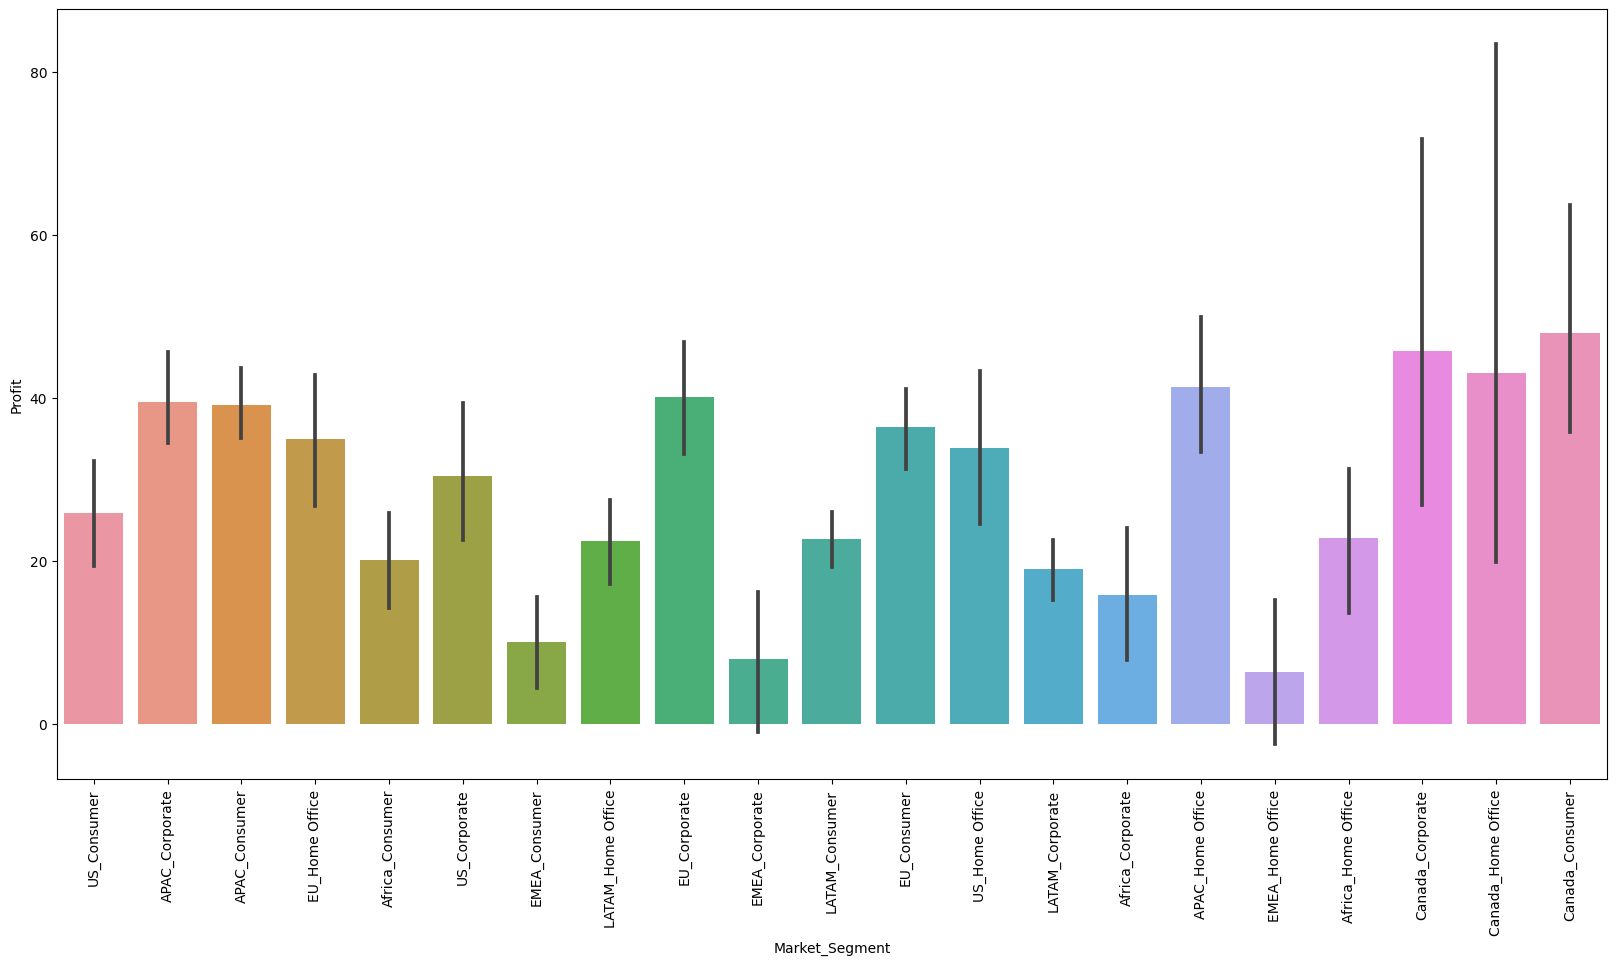

In [24]:
plt.figure(figsize=(20,10))
my_plot = sns.barplot(x='Market_Segment', y='Profit', data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
plt.show()

APAC_Consumer market segment is forecasted to have the highest profit , while Canada_Home Office market segment is forecasted to have the lowest profit

Drop the Market and Segment features from the dataset

In [25]:
df = df.drop(['Market', 'Segment'], axis=1)

In [26]:
df.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


`Convert the order-date into a date-time format`

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df= df.sort_values(by=['Order Date'])
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10924\2973804402.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')


,Order Date,Sales,Profit,Market_Segment
30643,2011-01,60.9600,28.6400,LATAM_Consumer
48527,2011-01,19.3000,5.7900,US_Consumer
29861,2011-01,51.6285,4.5885,APAC_Home Office
29871,2011-01,47.9600,15.8000,LATAM_Consumer
16508,2011-01,176.6808,-156.6792,APAC_Consumer


In [28]:
df.dtypes

Order Date        period[M]
Sales               float64
Profit              float64
Market_Segment       object
dtype: object

`Make a monthly aggregation of the profits in the dataset. Note that you can easily achieve this using a pivot table shown below`

In [29]:
# look further into this code and make changes to learn how it works
# Use pivot_table() function to make a monthly aggregation
# pivot = df.pivot_table(index='col1', values='col2', columns='col3', aggfunc='sum')
pivot = df.pivot_table(index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')

In [30]:
pivot

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.70,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.3600,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.0410,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.2230,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.8580,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.1020,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088
2011-06,4328.2596,1435.8294,3452.1018,-1290.639,-259.218,-774.801,7.50,40.08,23.40,-267.030,...,-2371.776,4317.4515,2270.8170,1210.2930,1039.27972,2558.46696,643.69764,3486.7664,67.0149,1422.7431
2011-07,1258.9617,525.4647,-42.0498,621.168,134.847,-506.562,47.28,528.33,8.40,-942.603,...,-150.114,760.6920,916.9500,418.9350,1906.45620,303.29032,363.28400,-2227.2786,1308.7058,77.0902
2011-08,775.8066,4070.5581,775.7616,232.917,915.885,1090.200,43.68,29.70,NaN,285.270,...,183.276,5498.6715,1626.2670,184.6140,1946.89372,180.54028,661.66792,2157.7522,2245.4838,914.8690
2011-09,5181.4449,1952.4675,623.3595,-86.163,950.766,1345.740,134.01,10.17,NaN,1012.101,...,1151.358,5921.8785,5390.6625,2492.9010,1632.48620,386.77900,179.39744,8312.1203,-948.1010,964.0801


In [31]:
# Grouping by Market_Segment to calculate total profit for each market segment
df_grouped = df.groupby(['Market_Segment'])['Profit'].sum()
df_grouped = pd.DataFrame(df_grouped)

In [32]:
df_grouped

,Profit
Market_Segment,
APAC_Consumer,222817.56040
APAC_Corporate,129737.23480
APAC_Home Office,83445.25380
Africa_Consumer,47772.09900
Africa_Corporate,20686.96500
Africa_Home Office,20412.56700
Canada_Consumer,9677.70000
Canada_Corporate,5036.46000
Canada_Home Office,3103.23000


Profit is forecasted to be highest for APAC_Consumer market_segment and lowest for Canada_Home Office market_segment

In [33]:
df = pd.DataFrame(df)

In [34]:
df

,Order Date,Sales,Profit,Market_Segment
30643,2011-01,60.9600,28.6400,LATAM_Consumer
48527,2011-01,19.3000,5.7900,US_Consumer
29861,2011-01,51.6285,4.5885,APAC_Home Office
29871,2011-01,47.9600,15.8000,LATAM_Consumer
16508,2011-01,176.6808,-156.6792,APAC_Consumer
...,...,...,...,...
40408,2014-12,53.4930,-32.1270,APAC_Consumer
40403,2014-12,56.5200,23.7000,APAC_Consumer
47999,2014-12,18.5280,-15.7620,EMEA_Consumer
31196,2014-12,65.4000,-53.9700,EMEA_Consumer


In [35]:
df.dtypes

Order Date        period[M]
Sales               float64
Profit              float64
Market_Segment       object
dtype: object

`Convert the Order-Date column from "DateTime" to "timestamp"`

In [36]:
# first check the datatype of 'Order Date'
df['Order Date'].dtypes

period[M]

In [37]:
# now convert to a string
df["Order Date"] = df["Order Date"].astype(str)

In [38]:
df

,Order Date,Sales,Profit,Market_Segment
30643,2011-01,60.9600,28.6400,LATAM_Consumer
48527,2011-01,19.3000,5.7900,US_Consumer
29861,2011-01,51.6285,4.5885,APAC_Home Office
29871,2011-01,47.9600,15.8000,LATAM_Consumer
16508,2011-01,176.6808,-156.6792,APAC_Consumer
...,...,...,...,...
40408,2014-12,53.4930,-32.1270,APAC_Consumer
40403,2014-12,56.5200,23.7000,APAC_Consumer
47999,2014-12,18.5280,-15.7620,EMEA_Consumer
31196,2014-12,65.4000,-53.9700,EMEA_Consumer


In [39]:
df.dtypes

Order Date         object
Sales             float64
Profit            float64
Market_Segment     object
dtype: object

In [40]:
# now convert to a pandas datetime using pd.to_datetime()
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [41]:
# now check the dtpe (if done correctly dtype should equal dtype('<M8[ns]') )

In [42]:
df

,Order Date,Sales,Profit,Market_Segment
30643,2011-01-01,60.9600,28.6400,LATAM_Consumer
48527,2011-01-01,19.3000,5.7900,US_Consumer
29861,2011-01-01,51.6285,4.5885,APAC_Home Office
29871,2011-01-01,47.9600,15.8000,LATAM_Consumer
16508,2011-01-01,176.6808,-156.6792,APAC_Consumer
...,...,...,...,...
40408,2014-12-01,53.4930,-32.1270,APAC_Consumer
40403,2014-12-01,56.5200,23.7000,APAC_Consumer
47999,2014-12-01,18.5280,-15.7620,EMEA_Consumer
31196,2014-12-01,65.4000,-53.9700,EMEA_Consumer


In [43]:
df.dtypes

Order Date        datetime64[ns]
Sales                    float64
Profit                   float64
Market_Segment            object
dtype: object

In [44]:
# Introducing the month feature to aggregte the values month-wise later
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')
df['Month'] = pd.to_datetime(df['Month'],format="%Y-%m")
# indexing to Order date
df = df.set_index('Order Date')

In [45]:
df

,Sales,Profit,Market_Segment,Month
Order Date,,,,
2011-01-01,60.9600,28.6400,LATAM_Consumer,2011-01-01
2011-01-01,19.3000,5.7900,US_Consumer,2011-01-01
2011-01-01,51.6285,4.5885,APAC_Home Office,2011-01-01
2011-01-01,47.9600,15.8000,LATAM_Consumer,2011-01-01
2011-01-01,176.6808,-156.6792,APAC_Consumer,2011-01-01
...,...,...,...,...
2014-12-01,53.4930,-32.1270,APAC_Consumer,2014-12-01
2014-12-01,56.5200,23.7000,APAC_Consumer,2014-12-01
2014-12-01,18.5280,-15.7620,EMEA_Consumer,2014-12-01


In [46]:
df.dtypes

Sales                    float64
Profit                   float64
Market_Segment            object
Month             datetime64[ns]
dtype: object

`Filter the Data for Best Market Segment - Note that the best market segment was found from sales and profits comparision above`

In [47]:
# To  forecast the sales for a period of 6 months
# We split the dataset into train and test data
# We have 48 months in total in the dataset
# We take the last 6 months as the test data and the rest as the train data
# Then calculate the CoV to determine the market segment with the highest profit

# Splitting train and test 
train_pivot = pivot[:42]
test_pivot = pivot[42:]



In [48]:
# Finding the most profitable Market Segment using Coeffecient of Variation (CoV)

CoV = train_pivot.std(axis = 0)/train_pivot.mean(axis = 0)
CoV = pd.DataFrame(CoV, columns = ['CoV'])
CoV = CoV.sort_values(by = 'CoV')

In [49]:
CoV

,CoV
Market_Segment,
APAC_Consumer,0.603633
EU_Consumer,0.655334
LATAM_Consumer,0.688935
EU_Corporate,0.697702
APAC_Corporate,0.740799
LATAM_Corporate,0.890930
US_Corporate,1.039660
APAC_Home Office,1.061530
US_Consumer,1.108571


It looks like APAC_Consumer is the most profitable market segment as it has the least CoV

In [50]:
# From this point, we would only forecast sales for the APAC_Consumer market segment

# Filtering the Market_Segment for APAC Consumer
df = df.loc[df['Market_Segment'] == 'APAC_Consumer']


In [51]:
# store this new filtered dataset in a new variable
df_best_mkt_seg = df.loc[df['Market_Segment'] == 'APAC_Consumer']

In [52]:
df_best_mkt_seg.head()

,Sales,Profit,Market_Segment,Month
Order Date,,,,
2011-01-01,176.6808,-156.6792,APAC_Consumer,2011-01-01
2011-01-01,69.3000,3.4200,APAC_Consumer,2011-01-01
2011-01-01,219.9600,8.7600,APAC_Consumer,2011-01-01
2011-01-01,337.6395,-122.8005,APAC_Consumer,2011-01-01
2011-01-01,30.4560,12.0960,APAC_Consumer,2011-01-01


`Group the data based on Order date and finding sales`

In [53]:
# Prepare the dataset with Month and Sales columns
df = df.groupby('Month')['Sales'].sum()
df = pd.DataFrame(df)

In [54]:
df

,Sales
Month,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723
2011-06-01,27260.0196
2011-07-01,15842.8317
2011-08-01,22012.2366
2011-09-01,34613.1849


In [55]:
df.shape

(48, 1)

`Visualize the trend in sales for this new dataset`

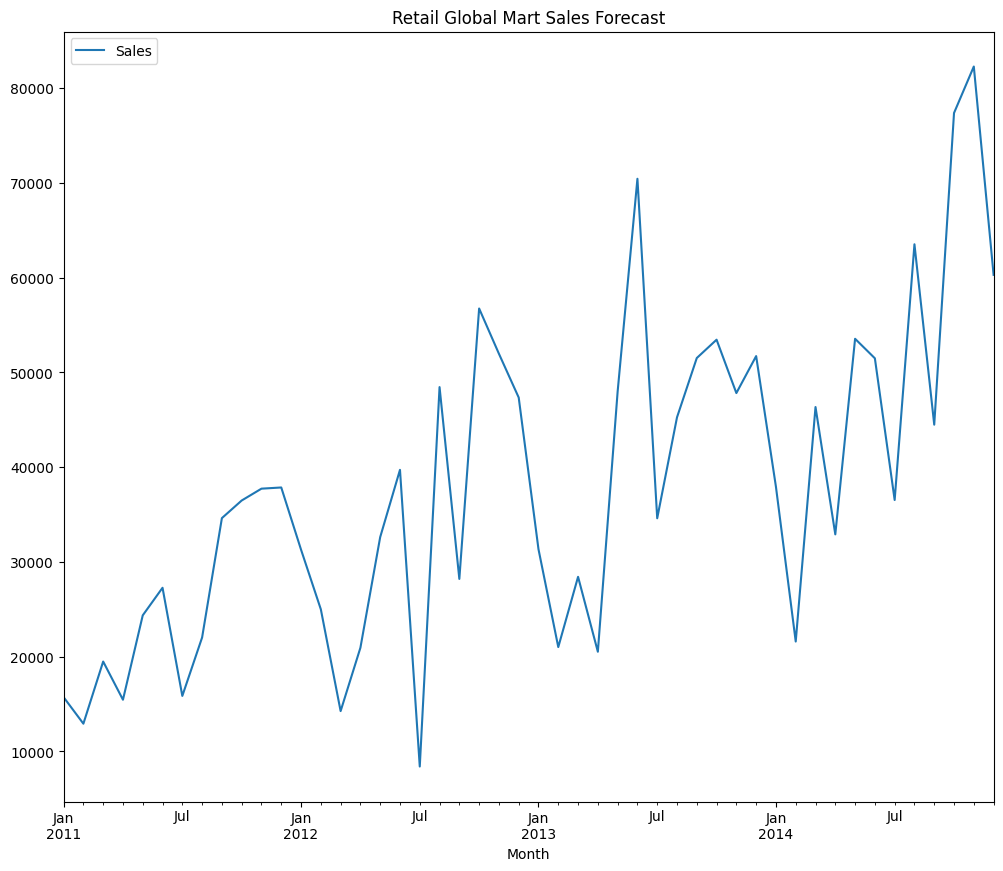

In [56]:
df.plot(figsize=[12,10])
plt.legend(loc = 'upper left')
plt.title('Retail Global Mart Sales Forecast')
plt.show(block=False)

There's a general upward trends in sales over the period of the years from Jan 2011 towards the end of 2014, with some seasonalities occurring within the period, indicated by the upward and downward movements as shown on the plot. 

`Go on from this step to find new insights from the dataset`

In [57]:
#Splitting train and test datasets
train_len = 42
train = df[0:train_len] # first 42 months as training set
test = df[train_len:] # last 6 months as testing set

In [58]:
# reading the train dataset
train.head()

,Sales
Month,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [59]:
# Shape of train dataset
train.shape

(42, 1)

In [60]:
# # reading the test dataset
test

,Sales
Month,
2014-07-01,36524.3028
2014-08-01,63521.7729
2014-09-01,44477.2662
2014-10-01,77379.8286
2014-11-01,82286.3583
2014-12-01,60292.1310


In [61]:
test.shape

(6, 1)

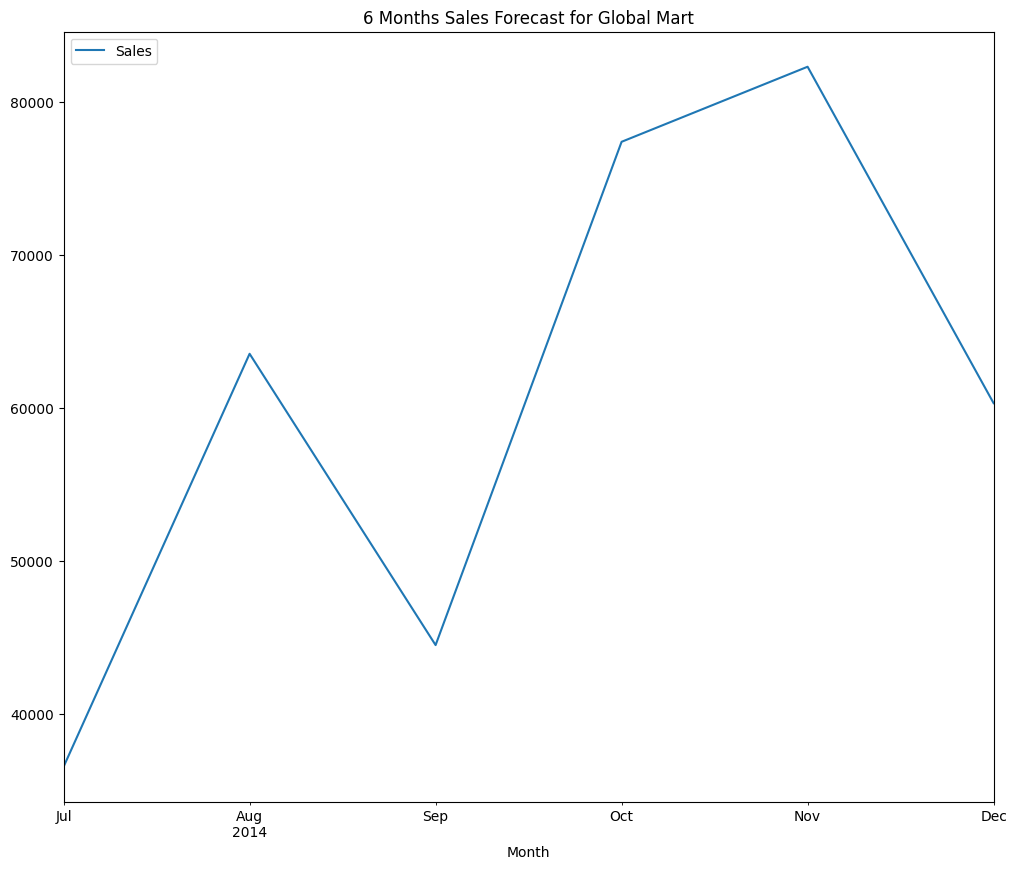

In [62]:
test.plot(figsize=[12,10])
plt.legend(loc = 'upper left')
plt.title('6 Months Sales Forecast for Global Mart')
plt.show(block=False)

There seems to be an upward trend for a period of 6 months forecast and some seasonal components as well